In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns
from datetime import date
from datetime import datetime


---
# Inicio

In [2]:
#Cargamos los datos y vemos los primeros registros
data = pd.read_csv('data/listings.csv')
pd.set_option('display.max_columns', None)
data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20220922013624,2022-09-22,city scrape,Amazing Luxurious Apt-Palermo Soho,<b>The space</b><br />LUXURIOUS NEW APT: 1 BDR...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,https://www.airbnb.com/users/show/42762,Candela,2009-10-01,"New York, NY",-,within a few hours,100%,75%,f,https://a0.muscache.com/im/users/42762/profile...,https://a0.muscache.com/im/users/42762/profile...,Palermo,1,2,"['email', 'phone']",t,t,"Buenos Aires, Capital Federal, Argentina",Palermo,NaN,-34.58184,-58.42415,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Shared fenced garden or backyard"", ""Elevator...","$9,823.00",3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,10,39,314,2022-09-22,30,3,0,2012-07-02,2022-07-17,4.77,4.93,4.86,4.90,4.97,4.93,4.93,NaN,f,1,1,0,0,0.24
1,118877,https://www.airbnb.com/rooms/118877,20220922013624,2022-09-22,city scrape,Entire Studio/apt in Buenos Aires,<b>The space</b><br />Inspired by the cultural...,NaN,https://a0.muscache.com/pictures/777724/21a535...,600320,https://www.airbnb.com/users/show/600320,Roxana,2011-05-18,"Buenos Aires, Argentina",Vivo en Palermo Hollywood hace mas de 20 años ...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/37f1b...,https://a0.muscache.com/im/pictures/user/37f1b...,Palermo,2,11,"['email', 'phone']",t,t,NaN,Palermo,NaN,-34.57734,-58.43790,Entire loft,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Pack \u2019n play/Travel crib"", ""Refrigerato...","$5,687.00",2,730,2,2,730,730,2.0,730.0,NaN,t,0,0,0,174,2022-09-22,24,5,0,2011-10-17,2022-06-21,4.63,4.55,4.77,4.77,4.86,4.45,4.64,NaN,t,2,2,0,0,0.18
2,14222,https://www.airbnb.com/rooms/14222,20220922013624,2022-09-22,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,https://www.airbnb.com/users/show/87710233,María,2016-08-03,"Buenos Aires, Argentina","Soy Organizadora de Eventos, me gusta relacion...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/dc9d9...,https://a0.muscache.com/im/pictures/user/dc9d9...,NaN,4,6,"['email', 'phone']",t,t,"Palermo/Buenos Aires, Autonomous City of Bueno...",Palermo,NaN,-34.58617,-58.41036,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Host greets you"", ""Refrigerator"", ""Heating"",...","$3,728.00",7,1125,7,7,1125,1125,7.0,1125.0,NaN,t,6,19,49,324,2022-09-22,98,8,0,2012-07-10,2022-08-14,4.77,4.74,4.76,4.78,4.89,4.88,4.73,NaN,f,3,2,1,0,0.79
3,120874,https://www.airbnb.com/rooms/120874,20220922013624,2022-09-22,city scra

---
# Vemos las columnas

In [3]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17947 entries, 0 to 17946
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17947 non-null  int64  
 1   listing_url                                   17947 non-null  object 
 2   scrape_id                                     17947 non-null  int64  
 3   last_scraped                                  17947 non-null  object 
 4   source                                        17947 non-null  object 
 5   name                                          17944 non-null  object 
 6   description                                   17435 non-null  object 
 7   neighborhood_overview                         10426 non-null  object 
 8   picture_url                                   17947 non-null  object 
 9   host_id                                       17947 non-null 

---
Eliminamos las columnas que no aportan informacion

Estructura del dataset e información acerca de las columnas

https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596



In [4]:
data = data.drop(['id','source','availability_30','availability_60','availability_90','availability_365','listing_url','scrape_id','last_scraped','picture_url','host_id','host_url','host_name',
       'host_location','host_neighbourhood','reviews_per_month','neighborhood_overview','neighbourhood','neighbourhood_group_cleansed',
      'host_response_rate','host_thumbnail_url','host_about','host_response_time','host_response_rate',
      'host_acceptance_rate','host_thumbnail_url','host_picture_url','host_listings_count',
      'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
      'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated', 'calendar_last_scraped',
      'has_availability','host_response_time','host_total_listings_count',
      'number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review',
      'review_scores_rating','review_scores_location','review_scores_accuracy','review_scores_cleanliness',
                  'review_scores_checkin','review_scores_communication','review_scores_value',
                  'license','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
      'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'
    ], axis=1)
   

In [5]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17947 entries, 0 to 17946
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    17944 non-null  object 
 1   description             17435 non-null  object 
 2   host_since              17947 non-null  object 
 3   host_is_superhost       17947 non-null  object 
 4   host_verifications      17947 non-null  object 
 5   host_has_profile_pic    17947 non-null  object 
 6   host_identity_verified  17947 non-null  object 
 7   neighbourhood_cleansed  17947 non-null  object 
 8   latitude                17947 non-null  float64
 9   longitude               17947 non-null  float64
 10  property_type           17947 non-null  object 
 11  room_type               17947 non-null  object 
 12  accommodates            17947 non-null  int64  
 13  bathrooms               0 non-null      float64
 14  bathrooms_text          17900 non-null

In [6]:
data.head(5)

,name,description,host_since,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,instant_bookable
0,Amazing Luxurious Apt-Palermo Soho,<b>The space</b><br />LUXURIOUS NEW APT: 1 BDR...,2009-10-01,f,"['email', 'phone']",t,t,Palermo,-34.58184,-58.42415,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Shared fenced garden or backyard"", ""Elevator...","$9,823.00",3,1125,f
1,Entire Studio/apt in Buenos Aires,<b>The space</b><br />Inspired by the cultural...,2011-05-18,t,"['email', 'phone']",t,t,Palermo,-34.57734,-58.43790,Entire loft,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Pack \u2019n play/Travel crib"", ""Refrigerato...","$5,687.00",2,730,t
2,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,2016-08-03,f,"['email', 'phone']",t,t,Palermo,-34.58617,-58.41036,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Host greets you"", ""Refrigerator"", ""Heating"",...","$3,728.00",7,1125,f
3,Great apt 1 Bedroom - 1.5 Bath /Recoleta,<b>The space</b><br />This great apartment is ...,2011-04-23,t,"['email', 'phone']",t,t,Recoleta,-34.58991,-58.39931,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,1.0,1.0,"[""Elevator"", ""Refrigerator"", ""Heating"", ""Carbo...","$6,514.00",14,1125,f
4,Spotless entire apt. Ideal location,Apartment is situated on 4th floor. There are ...,2011-03-06,t,"['email', 'phone']",t,f,Almagro,-34.61982,-58.41660,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Elevator"", ""Refrigerator"", ""Heating"", ""Carbo...","$3,584.00",5,730,t


<AxesSubplot:title={'center':'Nulos por columna'}, ylabel='Columna'>

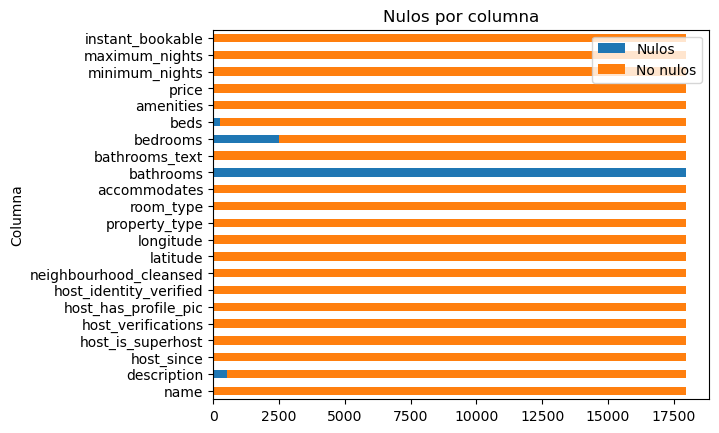

In [7]:
nulls = pd.DataFrame({'Columna':data.columns, 'Nulos':data.isnull().sum(),'No nulos':data.notnull().sum()})

# plot a Stacked Bar Chart using matplotlib
nulls.plot(
  x = 'Columna', 
  kind = 'barh', 
  stacked = True, 
  title = 'Nulos por columna', 
  mark_right = True)

Extraemos el tipo de baño y la cantidad

In [8]:
def extractBathRoomType(row):  
        if ("shared" in row["bathrooms_text"].lower()):
            return "shared"
        return "private"

def extractBathQuantity(row):  
        f = re.findall('\d*\.?\d+',row["bathrooms_text"])
        if (len(f)>0):
            return f[0]
        return "1"
    
data["bathrooms_text"] = data["bathrooms_text"].astype(str)
data["bathroomtype"] = data.apply(lambda x:extractBathRoomType(x),axis =1)   
data["bathrooms"] = data.apply(lambda x:extractBathQuantity(x),axis =1)   

data["bathrooms"] = data["bathrooms"].astype(float)
data["bathrooms"] = data["bathrooms"].apply(np.ceil)
data["bathrooms"] = data["bathrooms"].astype(int)
data = data.drop(['bathrooms_text'], axis=1)


In [9]:
data.bathrooms.value_counts()

1     13061
2      3836
3       770
4       131
5        45
0        32
6        26
9        17
7        16
8         6
10        3
13        1
11        1
22        1
16        1
Name: bathrooms, dtype: int64

<AxesSubplot:title={'center':'Nulos por columna'}, ylabel='Columna'>

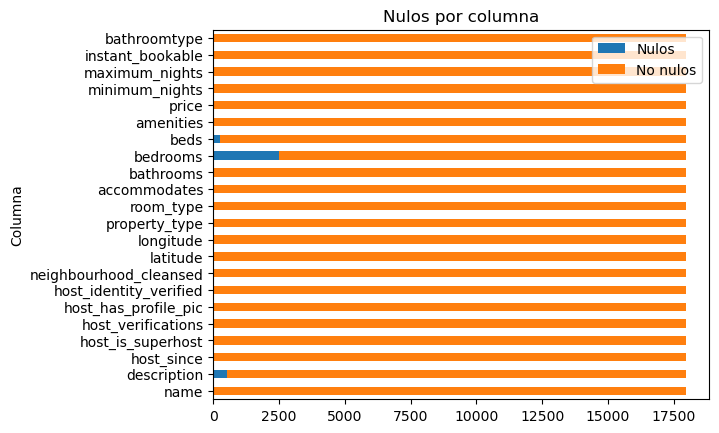

In [10]:
nulls = pd.DataFrame({'Columna':data.columns, 'Nulos':data.isnull().sum(),'No nulos':data.notnull().sum()})

# plot a Stacked Bar Chart using matplotlib
nulls.plot(
  x = 'Columna', 
  kind = 'barh', 
  stacked = True, 
  title = 'Nulos por columna', 
  mark_right = True)

In [11]:
#Relleno con patron regex según la palabra ambiente

numbers_es = ["mono","un","dos","tres","cuatro","cinco","seis"]
numbers_en = ["single","one","two","three","four","five","six"]


patron = '((?P<numero>\d|mono|un|dos|tres|cuatro|cinco|seis|single|one|two|three|four|five|six|1|2|3|4|5|6)\s*((?P<ambiente>amb)|(?P<bedroom>hab|bedroom|bdr)))'
patron_regex = re.compile(patron,flags = re.IGNORECASE)
  
          

In [12]:
#Rooms nulos antes
print('Nulos antes: ',data.bedrooms.isnull().sum())

def extractBedRoom(row):
    try:
        resultado=None
        ambientes=0
        if (row['description'] and isinstance(row['description'],str)):
            resultado = patron_regex.search(row['description'])
        if ((resultado is None) and row['name'] and isinstance(row['name'],str)):
            resultado = patron_regex.search(row['name'])
        if (resultado is not None):
            qty = 1
            if (resultado.group("numero") in numbers_es):
                qty = numbers_es.index(resultado.group("numero"))
                if (qty == 0):
                    qty = 1
            elif(resultado.group("numero") in numbers_en):
                qty = numbers_en.index(resultado.group("numero"))
                if (qty == 0):
                    qty = 1
            elif(isnumeric(resultado.group("numero"))):
                qty = int(resultado.group("numero"))
            if (resultado.group("ambiente")):
                if (qty > 1):
                    qty = qty - 1
            return qty    
    
    except:
        return np.nan       
            
        
data.loc[data.bedrooms.isnull(),'bedrooms'] = data.loc[data.bedrooms.isnull()].apply(extractBedRoom,axis=1)

#Rooms nulos despues de limpiar
print('Nulos después: ',data.bedrooms.isnull().sum())

Nulos antes:  2516
Nulos después:  2142


In [13]:
data.loc[data.bedrooms.isnull(),'bedrooms'] = 1
data.loc[data.beds.isnull(),'beds'] = 1

### Convertimos las columnas con true y false a números

In [14]:
data.replace({'f': 0, 't': 1}, inplace=True)

### Columna Precio

Quitamos el signo monetario, y lo convertimos a int

In [15]:
data.price = data.price.str[1:-3]
data.price = data.price.str.replace(",", "")
data.price = data.price.astype('int64')


In [16]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

data.price.describe()

count      17947.00000
mean       11307.98874
std       154991.57489
min          260.00000
25%         4136.00000
50%         5790.00000
75%         8685.00000
max     14330511.00000
Name: price, dtype: float64

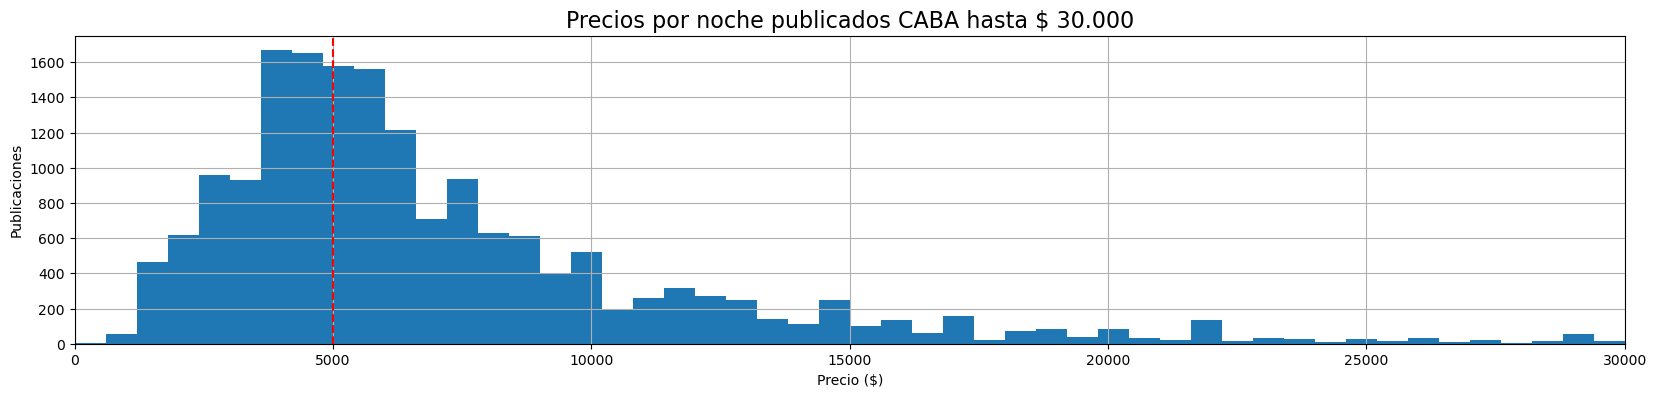

In [17]:
plt.figure(figsize=(20,4))
data.price.hist(bins=50, range=(0,30000))
plt.margins(x=0)
plt.axvline(5000, color='red', linestyle='--')
plt.title("Precios por noche publicados CABA hasta $ 30.000", fontsize=16)
plt.xlabel("Precio ($)")
plt.ylabel("Publicaciones")
plt.show()

### Tipo de propiedad

Vamos a normalizar los tipos de propiedades en Apartment, House, Hotel, y otros

In [18]:
data.property_type.value_counts()

Entire rental unit                    10818
Entire condo                           2512
Private room in rental unit             943
Entire loft                             675
Entire serviced apartment               674
                                      ...  
Private room in religious building        1
Entire in-law                             1
Private room in floor                     1
Shared room in casa particular            1
Cave                                      1
Name: property_type, Length: 71, dtype: int64

In [19]:
data.room_type.value_counts()

Entire home/apt    15603
Private room        2030
Shared room          194
Hotel room           120
Name: room_type, dtype: int64

In [20]:
data.loc[data["property_type"].str.contains("Entire cottage|Ranch|Shared room in guest suite|house|casa|villa|home|townhouse|chalet|Entire place|Entire cabin",case=False,na=False),"property_type"] = "House"
data.loc[data["property_type"].str.contains("Cave|Shared room in ryokan|loft|apartment|dept|condo|floor|rental unit|Entire in-law|Entire guest suite|Private room in guest suite|Private room",case=False,na=False),"property_type"] = "Apartment"
data.loc[data["property_type"].str.contains("Pension|hostel|hotel|bed and breakfast|resort",case=False,na=False),"property_type"] = "Hotel"
data.loc[~data.property_type.isin(['House', 'Apartment','Hotel']), 'property_type'] = 'Other'


In [21]:
pd.set_option('display.max_rows', 500)
data.property_type.value_counts()

Apartment    16096
House         1594
Hotel          244
Other           13
Name: property_type, dtype: int64

In [22]:
data = data.loc[data.property_type != "Hotel"]
data = data.loc[data.property_type != "Other"]
data.property_type.value_counts()

Apartment    16096
House         1594
Name: property_type, dtype: int64

In [23]:
data.describe()

,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,instant_bookable
count,17690.00000,17690.00000,17690.00000,17690.00000,17690.00000,17690.00000,17690.00000,17690.00000,17690.00000,17690.00000,17690.00000,17690.00000,17690.00000
mean,0.26450,0.98785,0.81068,-34.59036,-58.41812,2.85438,1.35348,1.31594,1.90492,10991.33844,7.74341,593.12442,0.40526
std,0.44108,0.10958,0.39177,0.01934,0.03051,1.50208,0.73863,0.89449,1.50128,154746.06448,28.13182,899.88556,0.49096
min,0.00000,0.00000,0.00000,-34.69370,-58.54437,1.00000,0.00000,1.00000,1.00000,260.00000,1.00000,1.00000,0.00000
25%,0.00000,1.00000,1.00000,-34.60094,-58.43751,2.00000,1.00000,1.00000,1.00000,4178.00000,2.00000,90.00000,0.00000
50%,0.00000,1.00000,1.00000,-34.58988,-58.41974,2.00000,1.00000,1.00000,1.00000,5790.00000,3.00000,365.00000,0.00000
75%,1.00000,1.00000,1.00000,-34.58034,-58.39384,4.00000,2.00000,1.00000,2.00000,8685.00000,5.00000,1125.00000,1.00000
max,1.00000,1.00000,1.00000,-34.51399,-58.35553,16.00000,16.00000,35.00000,70.00000,14330511.00000,1000.00000,99999.00000,1.00000


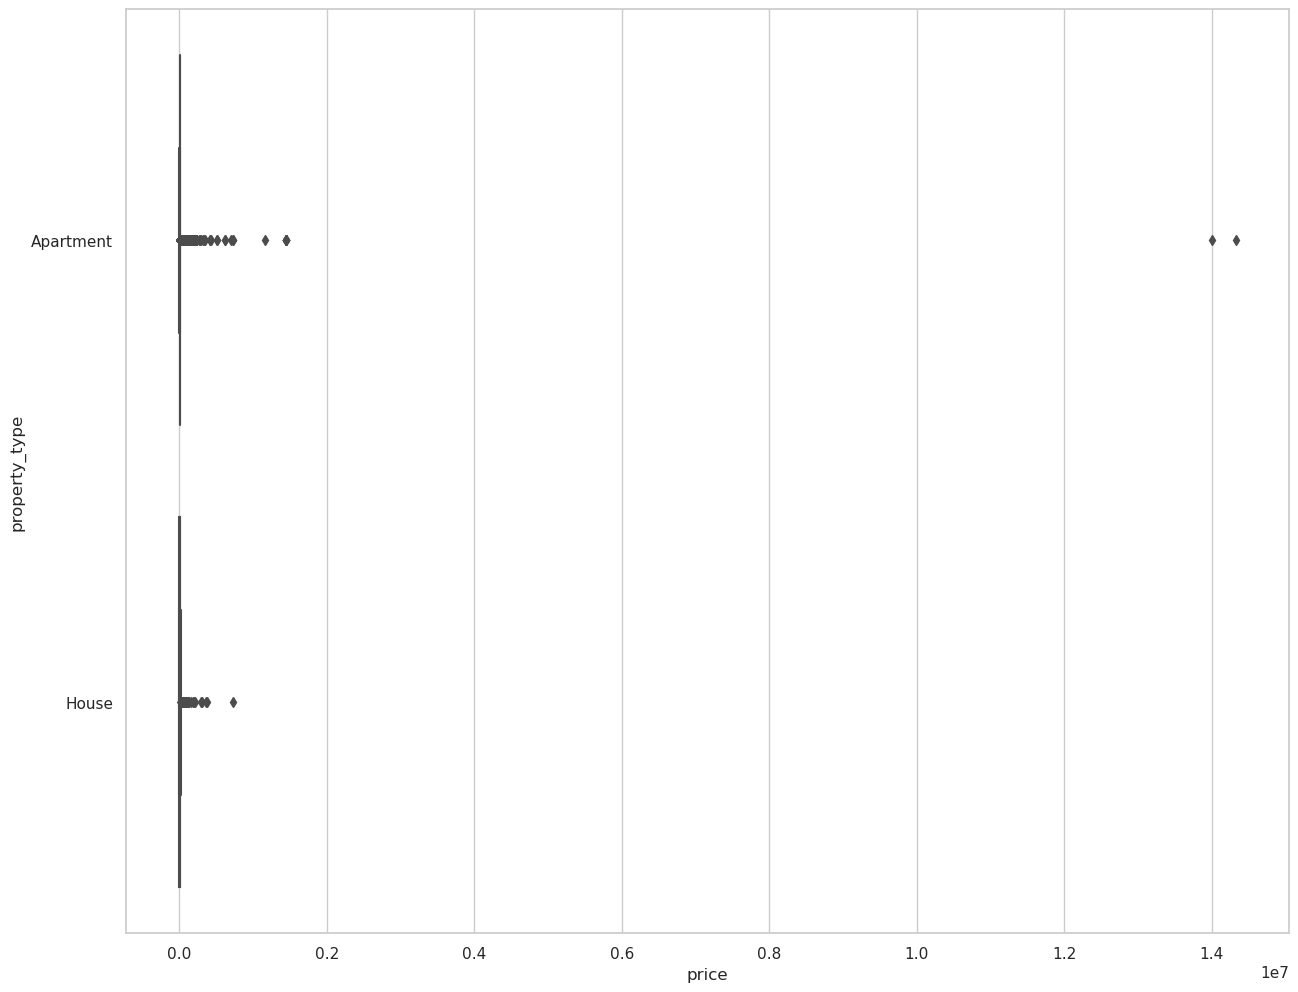

In [24]:
#Analizamos outliers mediante boxplot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,12))
sns.boxplot(data=data, x="price", y="property_type", orient="h")
plt.show()

In [25]:
def findOutliers(df, column, limit=4):
    """
    Devuelve outliers para una columna arriba del limite máximo
    Se puede ajustar el limite corriendo el 75%
    """
    q25, q50, q75 = df[column].quantile(q=[0.25, 0.5, 0.75])
    iqr = q75 - q25
    # max limits to be considered an outlier
    max_ = q75 + limit * iqr
    # identify the points
    outlier_mask = [True if x > max_ else False for x in df[column]]
    print('{} outliers found out of {} data points, {}% of the data. {} is the max'.format(
        sum(outlier_mask), len(df[column]),
        100 * (sum(outlier_mask) / len(df[column])),max_))
    return outlier_mask


In [26]:
# quitar outliers de precios
data=data[np.logical_not(findOutliers(data, 'price',limit=8))] 

204 outliers found out of 17690 data points, 1.1531938948558509% of the data. 44741.0 is the max


In [27]:
# quitar outliers de baños
data = data[np.logical_not(findOutliers(data, 'bathrooms',limit=6))]

17 outliers found out of 17486 data points, 0.09722063364977697% of the data. 8.0 is the max


In [28]:
# quitamos outliers de camas
data = data[np.logical_not(findOutliers(data, 'beds',limit=6))]

63 outliers found out of 17469 data points, 0.36063884595569295% of the data. 8.0 is the max


In [29]:
# quitamos outliers de noches minimas
data = data[np.logical_not(findOutliers(data, 'minimum_nights',limit=14))]

328 outliers found out of 17406 data points, 1.8844076755141905% of the data. 47.0 is the max


In [30]:
#convertimos a dias la fecha desde que el host se encuentra activo
data.host_since = pd.to_datetime(data.host_since) 

# Calculating the number of days
data['host_days_active'] = (datetime.now() - data.host_since).astype('timedelta64[D]')

# Replacing null values with the median
data.host_days_active.fillna(data.host_days_active.median(), inplace=True)


In [31]:
data.describe()

,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,instant_bookable,host_days_active
count,17078.00000,17078.00000,17078.00000,17078.00000,17078.00000,17078.00000,17078.00000,17078.00000,17078.00000,17078.00000,17078.00000,17078.00000,17078.00000,17078.00000
mean,0.26777,0.98770,0.81368,-34.59037,-58.41815,2.78212,1.31544,1.26824,1.82486,7382.78282,5.02535,590.14170,0.40614,2319.94373
std,0.44281,0.11021,0.38938,0.01928,0.03048,1.24745,0.60049,0.64299,1.09749,5534.61498,6.46770,911.70714,0.49113,1083.58379
min,0.00000,0.00000,0.00000,-34.69370,-58.54437,1.00000,0.00000,1.00000,1.00000,400.00000,1.00000,1.00000,0.00000,39.00000
25%,0.00000,1.00000,1.00000,-34.60083,-58.43749,2.00000,1.00000,1.00000,1.00000,4156.00000,2.00000,90.00000,0.00000,1534.00000
50%,0.00000,1.00000,1.00000,-34.58992,-58.41973,2.00000,1.00000,1.00000,1.00000,5790.00000,3.00000,365.00000,0.00000,2369.00000
75%,1.00000,1.00000,1.00000,-34.58040,-58.39401,4.00000,2.00000,1.00000,2.00000,8685.00000,5.00000,1125.00000,1.00000,3143.00000
max,1.00000,1.00000,1.00000,-34.51399,-58.35553,16.00000,8.00000,30.00000,8.00000,44729.00000,45.00000,99999.00000,1.00000,4946.00000


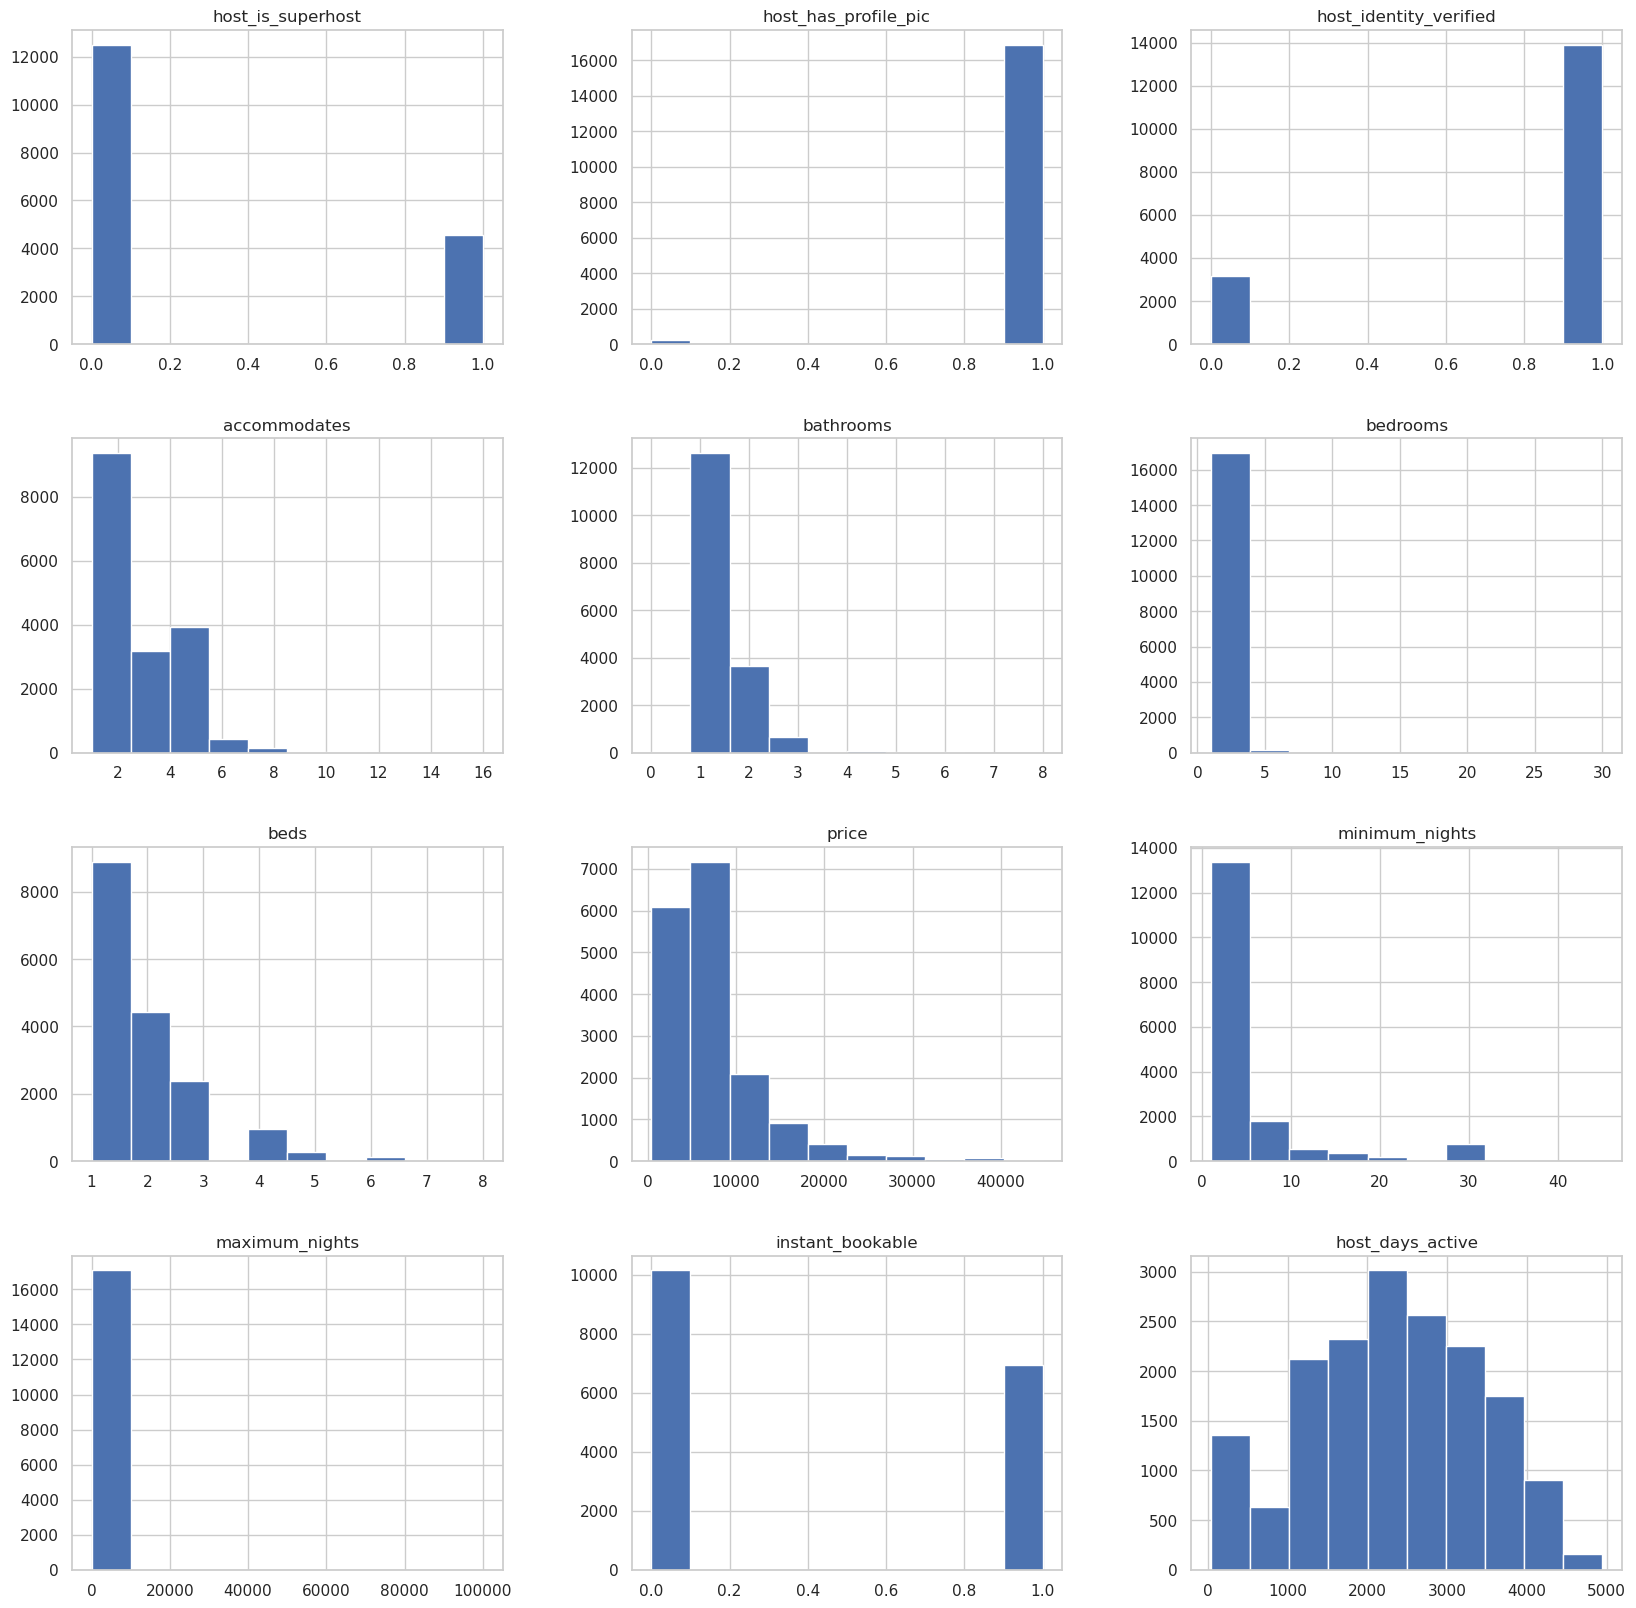

In [32]:
data.drop(['latitude','longitude'], axis=1).hist(figsize=(20,20));

# visualizamos la matriz de correlación en Seaborn usando a heatmap


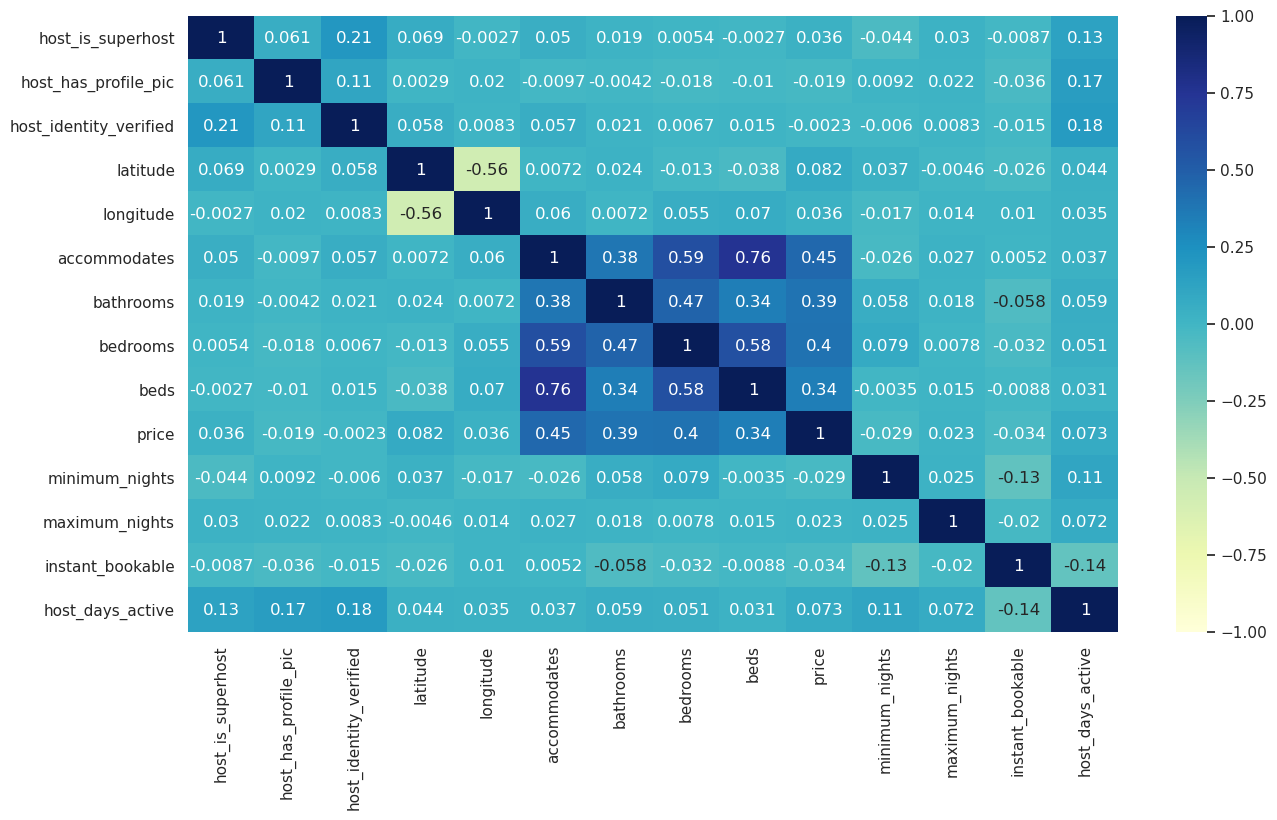

In [33]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True);

Tomamos los amenities

In [34]:
amenities = data.amenities.str.replace("[{}]", "").str.replace('"', "").str.replace('\\\\u2013', '-').str.replace('\\\\u2019','´').str.replace('\\\\u00f3','ó').str.replace('\\\\u00e9','é').str.replace('\\\\u00ed','í').str.replace('\\\\u00e1','á').str.replace('\\\\u00b4','').str.replace('\\\\u00f1','ñ').str.replace('\\\\u00a0','').str.replace('{', '').str.replace('}', ',').str.replace('[', '').str.replace(']', ',').str.replace('"', '')
amenities.head()    

0    Shared fenced garden or backyard, Elevator, Dr...
1    Pack ´n play/Travel crib, Refrigerator, Heatin...
2    Host greets you, Refrigerator, Heating, Essent...
3    Elevator, Refrigerator, Heating, Carbon monoxi...
4    Elevator, Refrigerator, Heating, Carbon monoxi...
Name: amenities, dtype: object

In [35]:
dict = [{"feature":"cable","values":["cable tv","TV with standard cable","cable"]}
       ,{"feature":"air_conditioning","values":["AC - split type ductless system","Air conditioning","aire acondicionado"]}
       ,{"feature":"outdoor","values":["Outdoor dining area","Patio or balcony","patio","balcony","jardin","Backyard","Garden","Outdoor","Sun loungers","Terrace"]}
       ,{"feature":"pool","values":["Shared pool","pool","pileta","piscina"]}
       ,{"feature":"parking","values":["Paid parking on premises","Paid parking lot off premises","Paid parking off premises","private parking","estacionamiento","cochera"]}
       ,{"feature":"tv","values":["tv","HDTV","Smart TV"]}
       ,{"feature":"internet","values":["Wifi","High speed cable","internet","Ethernet connection"]}
       ,{"feature":"white_goods","values":["Dryer","Free washer - In unit","Dishwasher","lavaplatos","washer","secarropas","lavavajilla"]}
       ,{"feature":"gym","values":["Exercise equipment","Gym","gimnasio"]}
       ,{"feature":"pet_friendly","values":["pet","pets","mascotas","mascota","Cat(s)","Dog(s)","perros","gatos"]}
       ,{"feature":"dishes_silverware","values":["Dishes and silverware","cubiertos","platos","vajilla","dishes","silverware"]} 
       ,{"feature":"essentials","values":["Essentials","Body Soap","soap","shampoo","jabon","Shower gel","Conditioner"]} 
       ,{"feature":"grill","values":["BBQ grill","parrilla","grill","BBQ","asador"]} 
       ,{"feature":"kitchen","values":["Kitchen","Cocina","Cooking basics","Oven"]} 
       ,{"feature":"long_term_stays_allowed","values":["Long term stays allowed"]}  
       ,{"feature":"heating","values":["Heating"]}
       ,{"feature":"elevator","values":["Elevator","Ascensor","elevador"]}  
       ,{"feature":"refrigerator","values":["Refrigerator"]}
       ,{"feature":"freezer","values":["Freezer"]} 
       ]        
     
    


In [36]:

for feat in dict:
    for x in feat["values"]:
        data.loc[data.amenities.str.contains(x,case=False,na=False),feat["feature"]] = 1 
        



/home/docker/.conda/envs/dhdsblend2021/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [37]:
data.loc[data.host_verifications.str.contains('phone',case=False,na=False),'phone_verification'] = 1 
data.loc[data.host_verifications.str.contains('work_email',case=False,na=False),'email_verification'] = 1 
data.loc[data.host_verifications.str.contains('email',case=False,na=False),'email_verification'] = 1 


In [38]:
data = data.fillna(0)

In [39]:
data.neighbourhood_cleansed.value_counts()

Palermo              5824
Recoleta             2630
San Nicolas          1012
Retiro                837
Belgrano              819
Almagro               614
Monserrat             590
Balvanera             568
Villa Crespo          529
Nuñez                 482
San Telmo             457
Colegiales            372
Caballito             319
Chacarita             245
Puerto Madero         212
Constitucion          205
Villa Urquiza         198
Saavedra              172
Barracas              128
San Cristobal          82
Flores                 73
Boedo                  63
Boca                   59
Villa Devoto           56
Coghlan                51
Villa Ortuzar          51
Villa Pueyrredon       42
Parque Chacabuco       38
Parque Patricios       37
Villa Del Parque       37
Paternal               27
Floresta               26
Villa Santa Rita       26
Parque Chas            25
Dique 2                19
Agronomia              17
Villa Luro             15
Villa Gral. Mitre      14
Velez Sarsfi

In [40]:
data.loc[data.neighbourhood_cleansed == "Dique 1","neighbourhood_cleansed"] = "Puerto Madero"
data.loc[data.neighbourhood_cleansed == "Dique 4","neighbourhood_cleansed"] = "Puerto Madero"
data.loc[data.neighbourhood_cleansed == "Dique 3","neighbourhood_cleansed"] = "Puerto Madero"
data.loc[data.neighbourhood_cleansed == "Dique 2","neighbourhood_cleansed"] = "Puerto Madero"
data.neighbourhood_cleansed.value_counts()

Palermo              5824
Recoleta             2630
San Nicolas          1012
Retiro                837
Belgrano              819
Almagro               614
Monserrat             590
Balvanera             568
Villa Crespo          529
Nuñez                 482
San Telmo             457
Colegiales            372
Caballito             319
Puerto Madero         247
Chacarita             245
Constitucion          205
Villa Urquiza         198
Saavedra              172
Barracas              128
San Cristobal          82
Flores                 73
Boedo                  63
Boca                   59
Villa Devoto           56
Villa Ortuzar          51
Coghlan                51
Villa Pueyrredon       42
Parque Chacabuco       38
Villa Del Parque       37
Parque Patricios       37
Paternal               27
Villa Santa Rita       26
Floresta               26
Parque Chas            25
Agronomia              17
Villa Luro             15
Villa Gral. Mitre      14
Velez Sarsfield        13
Mataderos   

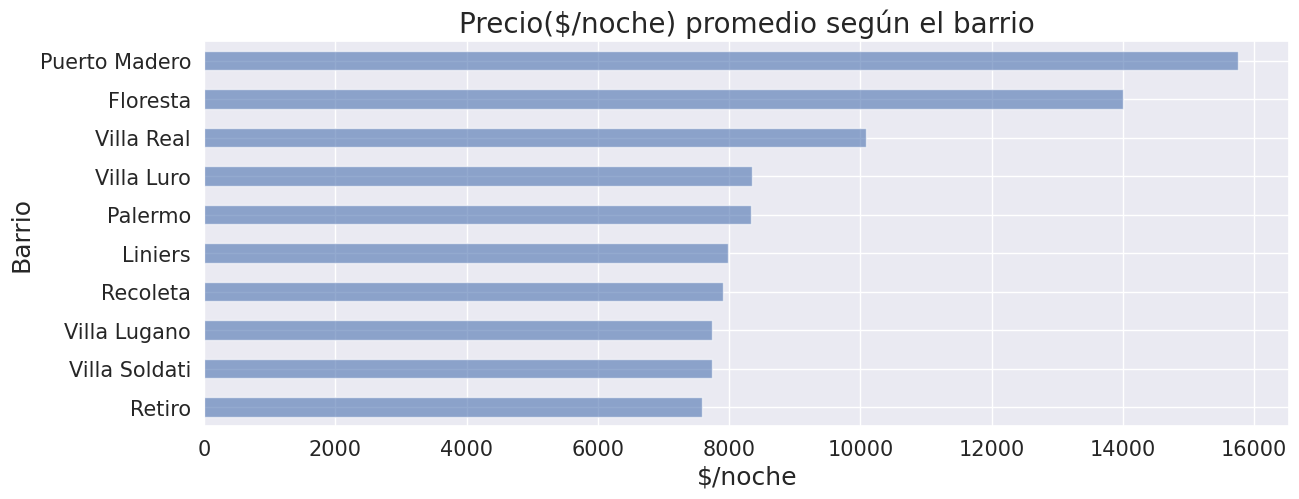

In [41]:
dfzone = data.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False)[0:10]
g = dfzone.sort_values().plot.barh(figsize=(14,5),color='b',fontsize=15, alpha=0.6);
g.set_title("Precio($/noche) promedio según el barrio", fontsize=20)
g.set_ylabel("Barrio", fontsize=18)
g.set_xlabel("$/noche", fontsize=18)
plt.show()

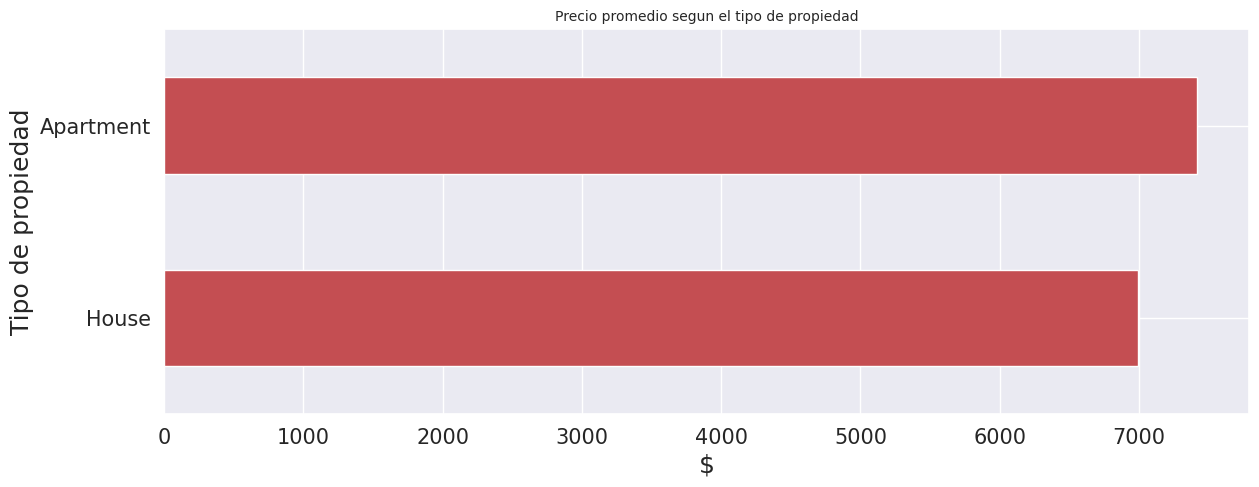

In [42]:
df_tipo_prop = data.groupby('property_type').mean()['price'].sort_values(ascending=False)[0:5]
graf = df_tipo_prop.sort_values().plot.barh(figsize=(14,5),fontsize=15, color='r')
graf.set_title("Precio promedio segun el tipo de propiedad", fontsize=10)
graf.set_ylabel("Tipo de propiedad", fontsize=18)
graf.set_xlabel("$", fontsize=18)
plt.show()

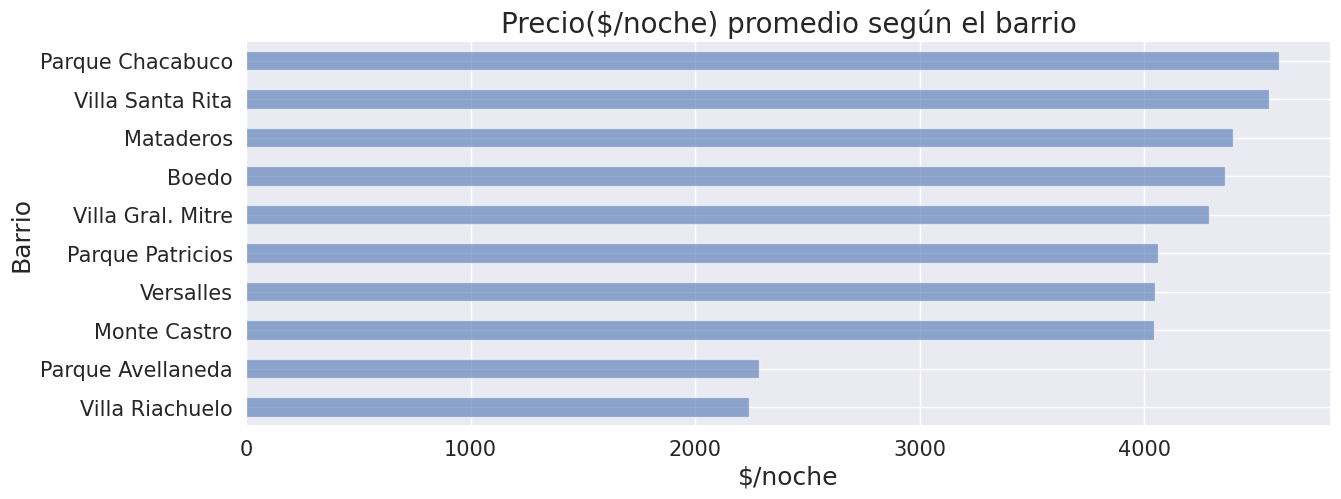

In [43]:
dfzone = data.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=True)[0:10]
g = dfzone.sort_values().plot.barh(figsize=(14,5),color='b',fontsize=15, alpha=0.6);
g.set_title("Precio($/noche) promedio según el barrio", fontsize=20)
g.set_ylabel("Barrio", fontsize=18)
g.set_xlabel("$/noche", fontsize=18)
plt.show()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17078 entries, 0 to 17946
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     17078 non-null  object        
 1   description              17078 non-null  object        
 2   host_since               17078 non-null  datetime64[ns]
 3   host_is_superhost        17078 non-null  int64         
 4   host_verifications       17078 non-null  object        
 5   host_has_profile_pic     17078 non-null  int64         
 6   host_identity_verified   17078 non-null  int64         
 7   neighbourhood_cleansed   17078 non-null  object        
 8   latitude                 17078 non-null  float64       
 9   longitude                17078 non-null  float64       
 10  property_type            17078 non-null  object        
 11  room_type                17078 non-null  object        
 12  accommodates             17078 n

In [45]:
data = data.drop(['name','description','amenities','host_since','host_verifications','latitude','longitude'], axis=1)


In [46]:
data = pd.get_dummies(data)

data.head(5)

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,instant_bookable,host_days_active,cable,air_conditioning,outdoor,pool,parking,tv,internet,white_goods,gym,pet_friendly,dishes_silverware,essentials,grill,kitchen,long_term_stays_allowed,heating,elevator,refrigerator,freezer,phone_verification,email_verification,neighbourhood_cleansed_Agronomia,neighbourhood_cleansed_Almagro,neighbourhood_cleansed_Balvanera,neighbourhood_cleansed_Barracas,neighbourhood_cleansed_Belgrano,neighbourhood_cleansed_Boca,neighbourhood_cleansed_Boedo,neighbourhood_cleansed_Caballito,neighbourhood_cleansed_Chacarita,neighbourhood_cleansed_Coghlan,neighbourhood_cleansed_Colegiales,neighbourhood_cleansed_Constitucion,neighbourhood_cleansed_Flores,neighbourhood_cleansed_Floresta,neighbourhood_cleansed_Liniers,neighbourhood_cleansed_Mataderos,neighbourhood_cleansed_Monserrat,neighbourhood_cleansed_Monte Castro,neighbourhood_cleansed_Nueva Pompeya,neighbourhood_cleansed_Nuñez,neighbourhood_cleansed_Palermo,neighbourhood_cleansed_Parque Avellaneda,neighbourhood_cleansed_Parque Chacabuco,neighbourhood_cleansed_Parque Chas,neighbourhood_cleansed_Parque Patricios,neighbourhood_cleansed_Paternal,neighbourhood_cleansed_Puerto Madero,neighbourhood_cleansed_Recoleta,neighbourhood_cleansed_Retiro,neighbourhood_cleansed_Saavedra,neighbourhood_cleansed_San Cristobal,neighbourhood_cleansed_San Nicolas,neighbourhood_cleansed_San Telmo,neighbourhood_cleansed_Velez Sarsfield,neighbourhood_cleansed_Versalles,neighbourhood_cleansed_Villa Crespo,neighbourhood_cleansed_Villa Del Parque,neighbourhood_cleansed_Villa Devoto,neighbourhood_cleansed_Villa Gral. Mitre,neighbourhood_cleansed_Villa Lugano,neighbourhood_cleansed_Villa Luro,neighbourhood_cleansed_Villa Ortuzar,neighbourhood_cleansed_Villa Pueyrredon,neighbourhood_cleansed_Villa Real,neighbourhood_cleansed_Villa Riachuelo,neighbourhood_cleansed_Villa Santa Rita,neighbourhood_cleansed_Villa Soldati,neighbourhood_cleansed_Villa Urquiza,property_type_Apartment,property_type_House,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathroomtype_private,bathroomtype_shared
0,0,1,1,2,1,1.00000,1.00000,9823,3,1125,0,4776.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,1,1,1,2,1,1.00000,1.00000,5687,2,730,1,4182.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2,0,1,1,2,1,1.00000,1.00000,3728,7,1125,0,2278.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3,1,1,1,4,2,1.00000,1.00000,6514,14,1125,0,4207.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,1,1,0,2,1,1.00000,1.00000,3584,5,730,1,4255.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0


In [47]:
data['bathrooms'] = data['bathrooms'].astype(int)
data['bedrooms'] = data['bedrooms'].astype(int)
data['host_days_active'] = data['host_days_active'].astype(int)
data['air_conditioning'] = data['air_conditioning'].astype(int)
data['beds'] = data['beds'].astype(int)
data['cable'] = data['cable'].astype(int)
data['outdoor'] = data['outdoor'].astype(int)
data['pool'] = data['pool'].astype(int)
data['parking'] = data['parking'].astype(int)
data['tv'] = data['tv'].astype(int)
data['parking'] = data['parking'].astype(int)
data['internet'] = data['internet'].astype(int)
data['white_goods'] = data['white_goods'].astype(int)
data['gym'] = data['gym'].astype(int)
data['pet_friendly'] = data['pet_friendly'].astype(int)
data['dishes_silverware'] = data['dishes_silverware'].astype(int)
data['essentials'] = data['essentials'].astype(int)
data['pet_friendly'] = data['pet_friendly'].astype(int)
data['kitchen'] = data['kitchen'].astype(int)
data['grill'] = data['grill'].astype(int)
data['long_term_stays_allowed'] = data['long_term_stays_allowed'].astype(int)
data['heating'] = data['heating'].astype(int)
data['elevator'] = data['elevator'].astype(int)
data['refrigerator'] = data['refrigerator'].astype(int)
data['freezer'] = data['freezer'].astype(int)
data['phone_verification'] = data['phone_verification'].astype(int)
data['email_verification'] = data['email_verification'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17078 entries, 0 to 17946
Data columns (total 89 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   host_is_superhost                         17078 non-null  int64
 1   host_has_profile_pic                      17078 non-null  int64
 2   host_identity_verified                    17078 non-null  int64
 3   accommodates                              17078 non-null  int64
 4   bathrooms                                 17078 non-null  int64
 5   bedrooms                                  17078 non-null  int64
 6   beds                                      17078 non-null  int64
 7   price                                     17078 non-null  int64
 8   minimum_nights                            17078 non-null  int64
 9   maximum_nights                            17078 non-null  int64
 10  instant_bookable                          17078 non-null  

In [48]:
data.to_csv("dataclean.csv")